### Regression Models

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import bamboolib as bam
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump, load

### Down Milling

#### Feature Set 1

In [23]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
#all_data = pd.read_csv('../data/train_{}.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
all_data

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.83250   800  23.664093     917.580527   
1     2           8000  0.2  0.065   6.47625  1040  28.025455    1817.287671   
2     3           8000  0.2  0.075   8.42100  1200  24.258964    2600.600669   
3     4           8000  0.2  0.100   6.81600  1600  23.584906    4141.970983   
4     5           8000  0.4  0.050  12.51250   800  43.182927    1232.354156   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   2.92575  3200  32.663636  126860.571274   
96   97          16000  1.0  0.050   6.09400  1600  16.813433   51788.152328   
97   98          16000  1.0  0.065   4.09975  2080  27.814126   85863.219053   
98   99          16000  1.0  0.075   3.23825  2400  17.141361   95383.532543   
99  100          16000  1.0  0.100   3.47700  3200  56.746269  131887.060299   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446   
1    50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851   
2    56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590   
3    68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957   
4    55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138   
..         ...       ...  ...       ...       ...       ...       ...   
95  356.862502     607.0  ...    1466.0     965.0  0.074937  2.450916   
96  227.766557     382.0  ...    1387.0     802.0 -0.135212  2.042409   
97  293.798656     524.0  ...    1447.0     918.0 -0.046218  2.144651   
98  308.509268     455.0  ...    1411.0     872.0 -0.158009  2.660414   
99  366.675667     590.0  ...    1550.0    1148.0 -0.217817  2.358557   

    robot_t8  robot_t9    clamp_f1   clamp_f2    robot_f1   robot_f2  
0   1.164723  1.162811   12.222404  19.191919   22.863227  14.646465  
1   1.125636  1.123908   17.382572  21.717172   25.495338  31.313131  
2   1.214723  1.212308   20.770490  21.717172   37.602301  31.313131  
3   1.221912  1.217963   27.491432  21.717172   39.944840   5.050505  
4   1.154345  1.152213   18.159337   9.595960   33.502295   6.060606  
..       ...       ...         ...        ...         ...        ...  
95  1.481595  1.447160  243.671946  21.212121   76.110895  40.909091  
96  1.401067  1.376350  146.029390  21.212121   83.654707  40.909091  
97  1.457688  1.424433  218.904376  21.212121  100.091163  38.383838  
98  1.428614  1.402853  263.678931   0.505051   90.098039  40.909091  
99  1.566924  1.513719  231.174047  21.212121   79.552251  40.909091  

[95 rows x 28 columns]

In [24]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [25]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

**Linear Regression on selected Features - scaled**

In [26]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [6]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [7]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [10]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred,))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 1.50
Coefficient of determination: 0.81
MAE:0.93
mean absolute percentage error:0.14


**Lasso Regression on selected Features - scaled**

In [28]:
alpha = np.geomspace(0.0001, 10.0, 50)

In [29]:
param_grid = {'lasso_regression__alpha': alpha}

In [30]:
s = StandardScaler()
las = Lasso(max_iter=100000)

In [31]:
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

This has to be the way, the alpha value should be tuned - not the way before because otherwise there would be information leakage from test data.

In [32]:
lasso_grid = GridSearchCV(estimator=estimator,
                          param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [33]:
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'lasso_regression__alpha': array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-...
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01])},
             scoring='neg_mean_absolute_error')

In [34]:
alpha = lasso_grid.best_params_['lasso_regression__alpha']

In [35]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [36]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 3.34
Coefficient of determination: 0.59
MAE:1.30
mean absolute percentage error:0.21


This approach leads to more bad results. This is due to the low ammoutn of data. Therefore, a hyperparameter tuning using only the training data and splitting of those training data results into bad results because of too low data sizes. To not be overly optimistic the alpha value is set to a constant value of 0.01 for all following models because no real overfittting occured for the linear regression model.

In [37]:
alpha = 0.01

In [38]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [39]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.04
Coefficient of determination: 0.75
MAE:1.02
mean absolute percentage error:0.15


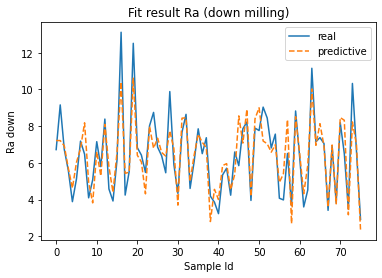

In [40]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

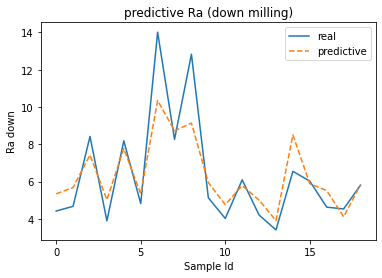

In [41]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [42]:
# scores = []
# alphas = np.geomspace(0.0001, 10.0, 50)
# for alpha in alphas:
#     rd = Ridge(alpha=alpha, max_iter=100000)
    
#     estimator = Pipeline([
#         ("scaler", s),
#         ("ridge_regression", rd)])

#     estimator.fit(x_train, y_train)
#     y_pred = estimator.predict(x_test)
    
#     score = r2_score(y_test, y_pred)
    
#     scores.append(score)
# this is a wrong approach because information from the final test set is leaked into the model tuning
# therefore, the prediction metrics are overly optimistic

In [43]:
#max(scores)

In [44]:
# maxidx = np.argmax(scores)
# alpha = alphas[maxidx]

In [45]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [46]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 1.57
Coefficient of determination: 0.81
MAE:0.91
mean absolute percentage error:0.13


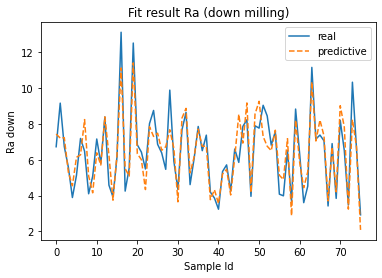

In [47]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

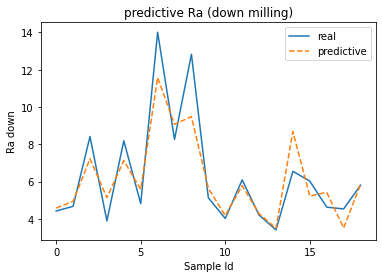

In [48]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [49]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [50]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 1.97
Coefficient of determination: 0.76
MAE:1.01
mean absolute percentage error:0.15


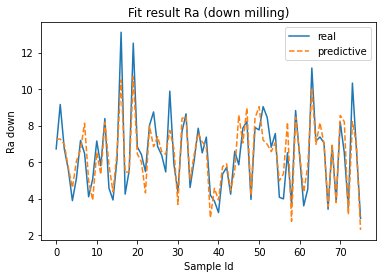

In [51]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

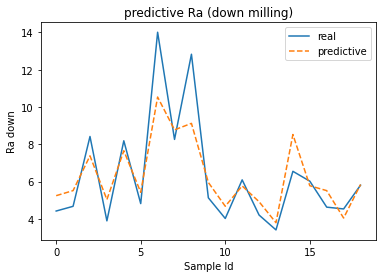

In [52]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

All models generate nearly the same result &#8594; nearly no overfitting occurs as the best regularization results are for the lowest alpha values

**Linear Regression only with vibrational Features**

In [4]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
#all_data = pd.read_csv('../data/train_{}.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
all_data

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.83250   800  23.664093     917.580527   
1     2           8000  0.2  0.065   6.47625  1040  28.025455    1817.287671   
2     3           8000  0.2  0.075   8.42100  1200  24.258964    2600.600669   
3     4           8000  0.2  0.100   6.81600  1600  23.584906    4141.970983   
4     5           8000  0.4  0.050  12.51250   800  43.182927    1232.354156   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   2.92575  3200  32.663636  126860.571274   
96   97          16000  1.0  0.050   6.09400  1600  16.813433   51788.152328   
97   98          16000  1.0  0.065   4.09975  2080  27.814126   85863.219053   
98   99          16000  1.0  0.075   3.23825  2400  17.141361   95383.532543   
99  100          16000  1.0  0.100   3.47700  3200  56.746269  131887.060299   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446   
1    50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851   
2    56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590   
3    68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957   
4    55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138   
..         ...       ...  ...       ...       ...       ...       ...   
95  356.862502     607.0  ...    1466.0     965.0  0.074937  2.450916   
96  227.766557     382.0  ...    1387.0     802.0 -0.135212  2.042409   
97  293.798656     524.0  ...    1447.0     918.0 -0.046218  2.144651   
98  308.509268     455.0  ...    1411.0     872.0 -0.158009  2.660414   
99  366.675667     590.0  ...    1550.0    1148.0 -0.217817  2.358557   

    robot_t8  robot_t9    clamp_f1   clamp_f2    robot_f1   robot_f2  
0   1.164723  1.162811   12.222404  19.191919   22.863227  14.646465  
1   1.125636  1.123908   17.382572  21.717172   25.495338  31.313131  
2   1.214723  1.212308   20.770490  21.717172   37.602301  31.313131  
3   1.221912  1.217963   27.491432  21.717172   39.944840   5.050505  
4   1.154345  1.152213   18.159337   9.595960   33.502295   6.060606  
..       ...       ...         ...        ...         ...        ...  
95  1.481595  1.447160  243.671946  21.212121   76.110895  40.909091  
96  1.401067  1.376350  146.029390  21.212121   83.654707  40.909091  
97  1.457688  1.424433  218.904376  21.212121  100.091163  38.383838  
98  1.428614  1.402853  263.678931   0.505051   90.098039  40.909091  
99  1.566924  1.513719  231.174047  21.212121   79.552251  40.909091  

[95 rows x 28 columns]

In [31]:
used_feature = ['clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [32]:
X = all_data[used_feature] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, 
#X = all_data.drop(['Ra_{}'.format(up_or_down), 'Nr.'], axis=1)
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = all_data['Ra_{}'.format(up_or_down)]

**Linear Regression on selected Features - scaled**

In [33]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [34]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [35]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [36]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 3.94
Coefficient of determination: 0.51
MAE:1.54
mean absolute percentage error:0.23


In [90]:
dump(estimator, 'final_regression_model.joblib') 

['final_regression_model.joblib']

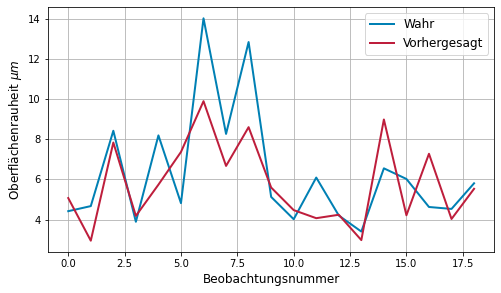

In [40]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(y_test.values, label='Wahr', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(y_pred, label='Vorhergesagt', color=(190/255, 30/255, 60/255), lw=2)
plt.grid()
plt.xlabel('Beobachtungsnummer', fontsize=12)
plt.ylabel(r'Oberflächenrauheit $\mu m$', fontsize=12)
plt.legend(fontsize=12)

plt.savefig('../images/MLR1.svg')

In [41]:
df = pd.DataFrame({'Test': y_test, 'Pred': y_pred})
df

Test      Pred
73   4.42275  5.075004
77   4.67525  2.955688
2    8.42100  7.834827
85   3.89550  4.187123
44   8.19050  5.741151
47   4.82100  7.366846
12  14.01250  9.891638
36   8.26400  6.672690
0   12.83250  8.599804
50   5.13175  5.598727
74   4.02275  4.475141
96   6.09400  4.074315
89   4.20700  4.244559
94   3.40950  2.984465
5    6.55275  8.981616
80   6.02425  4.218912
23   4.63100  7.275917
90   4.53450  4.034694
88   5.80875  5.534805

In [42]:
df = df.sort_values('Test')
df

Test      Pred
94   3.40950  2.984465
85   3.89550  4.187123
74   4.02275  4.475141
89   4.20700  4.244559
73   4.42275  5.075004
90   4.53450  4.034694
23   4.63100  7.275917
77   4.67525  2.955688
47   4.82100  7.366846
50   5.13175  5.598727
88   5.80875  5.534805
80   6.02425  4.218912
96   6.09400  4.074315
5    6.55275  8.981616
44   8.19050  5.741151
36   8.26400  6.672690
2    8.42100  7.834827
0   12.83250  8.599804
12  14.01250  9.891638

In [43]:
df['Diff'] = df['Pred'] - df['Test']
df

Test      Pred      Diff
94   3.40950  2.984465 -0.425035
85   3.89550  4.187123  0.291623
74   4.02275  4.475141  0.452391
89   4.20700  4.244559  0.037559
73   4.42275  5.075004  0.652254
90   4.53450  4.034694 -0.499806
23   4.63100  7.275917  2.644917
77   4.67525  2.955688 -1.719562
47   4.82100  7.366846  2.545846
50   5.13175  5.598727  0.466977
88   5.80875  5.534805 -0.273945
80   6.02425  4.218912 -1.805338
96   6.09400  4.074315 -2.019685
5    6.55275  8.981616  2.428866
44   8.19050  5.741151 -2.449349
36   8.26400  6.672690 -1.591310
2    8.42100  7.834827 -0.586173
0   12.83250  8.599804 -4.232696
12  14.01250  9.891638 -4.120862

In [44]:
4.232696/12.83250*100

32.98418858367426

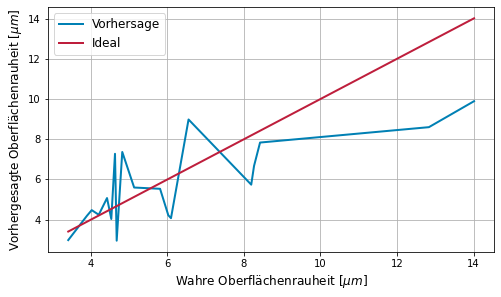

In [45]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(df['Test'].values, df['Pred'].values, label='Vorhersage', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(np.linspace(3.4095, 14.0125, endpoint=True), np.linspace(3.4095, 14.0125, endpoint=True), label='Ideal', color=(190/255, 30/255, 60/255), lw=2)
plt.grid()
plt.legend(fontsize=12)
plt.xlabel(r'Wahre Oberflächenrauheit $[\mu m]$', fontsize=12)
plt.ylabel(r'Vorhergesagte Oberflächenrauheit $[\mu m]$', fontsize=12)
plt.savefig('../images/MLR2.svg')

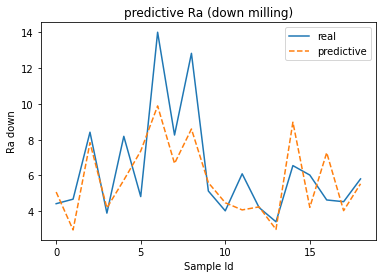

In [107]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Lasso Regression on selected Features - scaled**

In [60]:
s = StandardScaler()

In [61]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [64]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.52
Coefficient of determination: 0.44
MAE:1.51
mean absolute percentage error:0.22


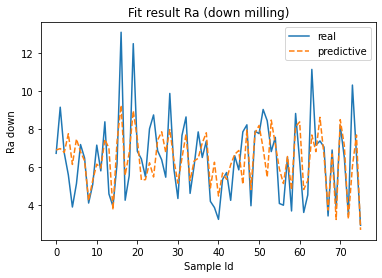

In [65]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

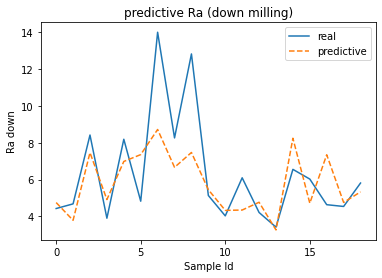

In [66]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [67]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [68]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 4.35
Coefficient of determination: 0.46
MAE:1.53
mean absolute percentage error:0.22


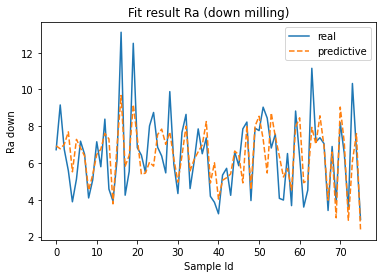

In [69]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

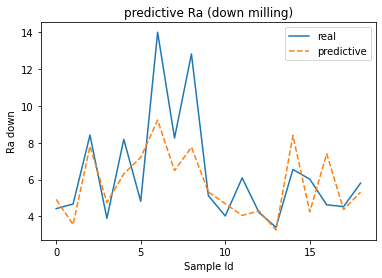

In [70]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [71]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [73]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 4.61
Coefficient of determination: 0.43
MAE:1.52
mean absolute percentage error:0.22


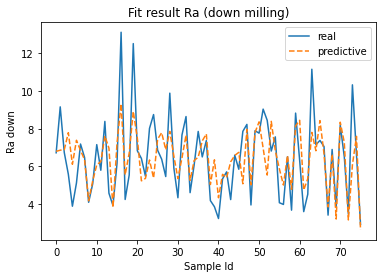

In [74]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Feature Set 2

In [2]:
train_data = pd.read_csv("../data/feature_set2/down_train_data.csv")
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = pd.read_csv("../data/feature_set2/down_test_data.csv")
test_data = test_data.drop(columns=["Unnamed: 0"])

In [3]:
x_train = train_data.drop(columns=["Ra_down"])
x_test = test_data.drop(columns=["Ra_down"])
y_train = train_data["Ra_down"].values
y_test = test_data["Ra_down"].values

In [4]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [5]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [6]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 3.25
Coefficient of determination: 0.60
MAE:1.33
mean absolute percentage error:0.23


**Lasso Regression on selected Features - scaled**

In [10]:
s = StandardScaler()

In [11]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [12]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 3.74
Coefficient of determination: 0.54
MAE:1.39
mean absolute percentage error:0.24


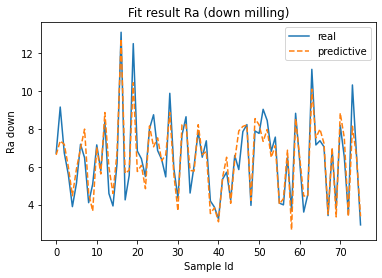

In [16]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

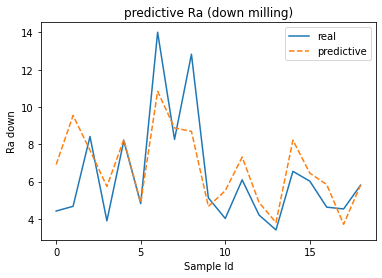

In [17]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [18]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [19]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 3.26
Coefficient of determination: 0.60
MAE:1.33
mean absolute percentage error:0.23


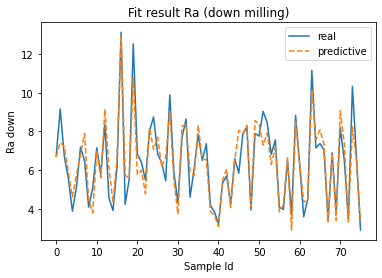

In [20]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

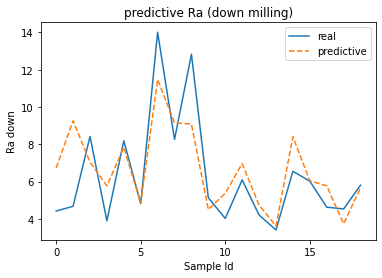

In [21]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [22]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [23]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 3.70
Coefficient of determination: 0.54
MAE:1.40
mean absolute percentage error:0.24


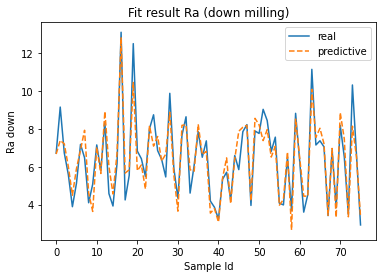

In [24]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

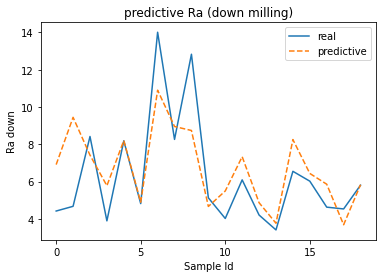

In [25]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Vibrational Data only**

In [26]:
x_train = train_data.drop(columns=["Ra_down", "vbs", "fz", "ap", "spindle_speed"])
x_test = test_data.drop(columns=["Ra_down", "vbs", "fz", "ap", "spindle_speed"])
y_train = train_data["Ra_down"].values
y_test = test_data["Ra_down"].values

In [27]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [28]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [29]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 6.87
Coefficient of determination: 0.15
MAE:1.96
mean absolute percentage error:0.33


**Lasso Regression on selected Features - scaled**

In [30]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [31]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.76
Coefficient of determination: 0.17
MAE:1.94
mean absolute percentage error:0.32


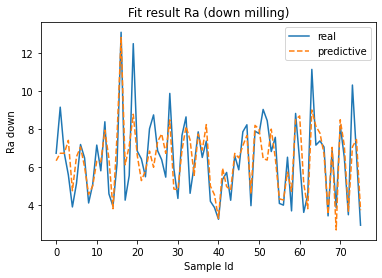

In [32]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

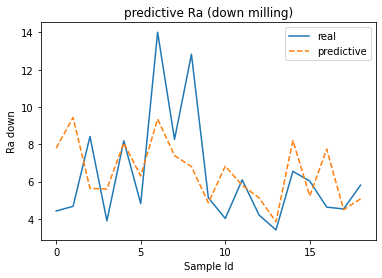

In [33]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [34]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [35]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.87
Coefficient of determination: 0.15
MAE:1.96
mean absolute percentage error:0.33


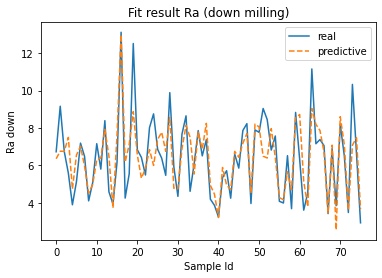

In [36]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

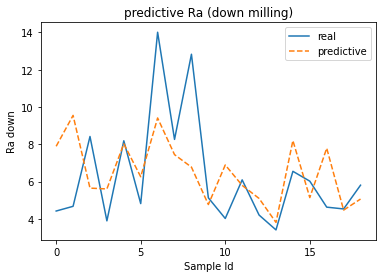

In [37]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [38]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [39]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.81
Coefficient of determination: 0.16
MAE:1.95
mean absolute percentage error:0.32


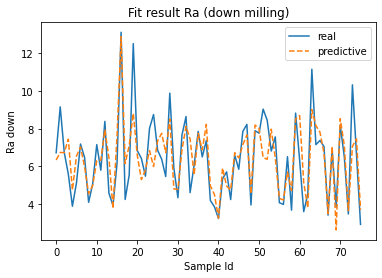

In [40]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

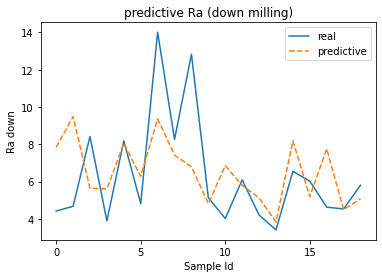

In [41]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Feature Set 3

In [3]:
train_data = pd.read_csv("../data/feature_set3/down_train_data.csv")
test_data = pd.read_csv("../data/feature_set3/down_test_data.csv")

##### Using all Features

In [4]:
x_train = train_data.drop(columns=["Unnamed: 0", "Ra_down"])
x_test = test_data.drop(columns=["Unnamed: 0", "Ra_down"])
y_train = train_data["Ra_down"]
y_test = test_data["Ra_down"]

In [5]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [6]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [7]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.21
Coefficient of determination: 0.73
MAE:1.10
mean absolute percentage error:0.17


**Lasso Regression on selected Features - scaled**

In [8]:
s = StandardScaler()

In [12]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [13]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.65
Coefficient of determination: 0.67
MAE:1.20
mean absolute percentage error:0.18


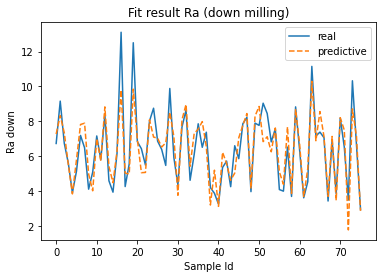

In [17]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

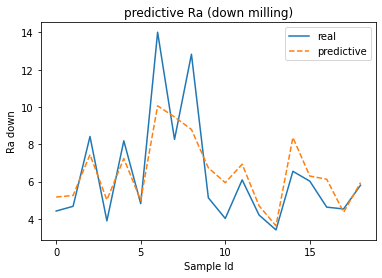

In [18]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [19]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [20]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.22
Coefficient of determination: 0.73
MAE:1.11
mean absolute percentage error:0.17


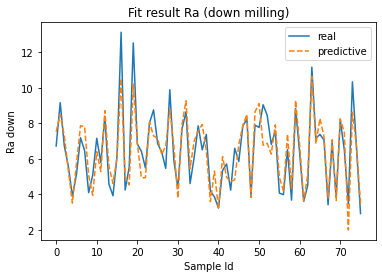

In [21]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

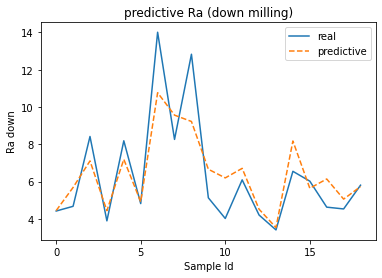

In [22]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [23]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [24]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.60
Coefficient of determination: 0.68
MAE:1.19
mean absolute percentage error:0.18


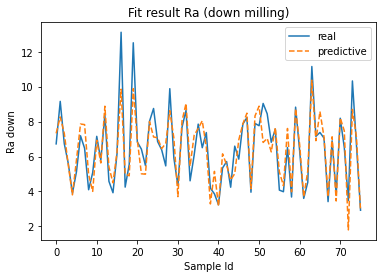

In [25]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

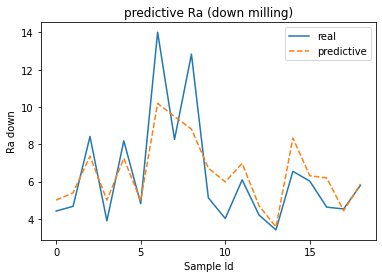

In [26]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Vibrational Data only**

In [27]:
x_train = train_data.drop(columns=["Unnamed: 0", "Ra_down", "spindle_speed", "vbs", "fz", "ap"])
x_test = test_data.drop(columns=["Unnamed: 0", "Ra_down", "spindle_speed", "vbs", "fz", "ap"''])
y_train = train_data["Ra_down"]
y_test = test_data["Ra_down"]

In [28]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [29]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [30]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.24
Coefficient of determination: 0.23
MAE:1.75
mean absolute percentage error:0.26


**Lasso Regression on selected Features - scaled**

In [31]:
s = StandardScaler()

In [32]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [33]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 5.93
Coefficient of determination: 0.27
MAE:1.74
mean absolute percentage error:0.26


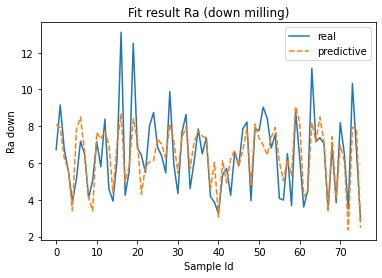

In [34]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

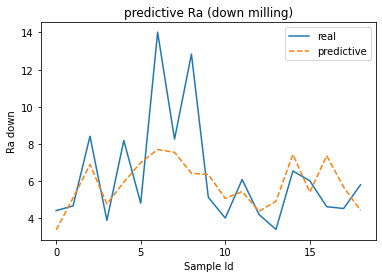

In [35]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [36]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [37]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.24
Coefficient of determination: 0.23
MAE:1.75
mean absolute percentage error:0.26


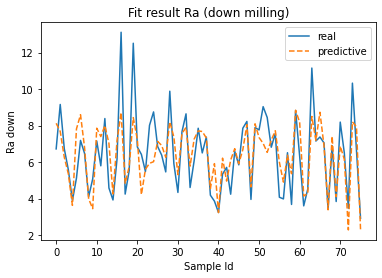

In [38]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

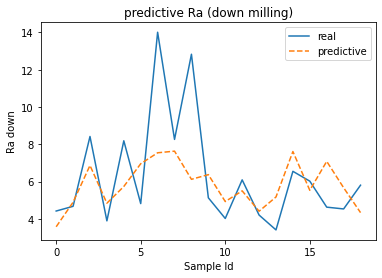

In [39]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [40]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [41]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.05
Coefficient of determination: 0.25
MAE:1.75
mean absolute percentage error:0.26


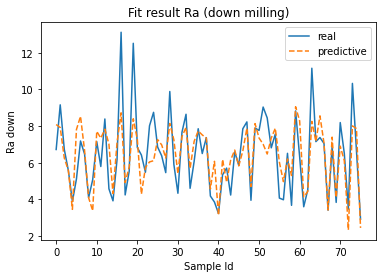

In [42]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

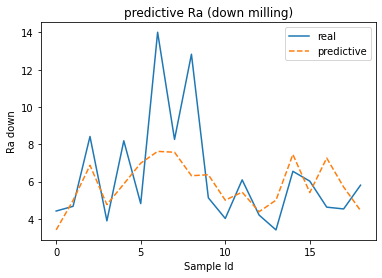

In [43]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

### Up Milling

#### Feature Set 1

In [158]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
#all_data = pd.read_csv('../data/train_{}.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
all_data

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.90500   800  26.229323    1295.769854   
1     2           8000  0.2  0.065   6.78175  1040  29.329545     994.685664   
2     3           8000  0.2  0.075   8.43450  1200  22.787313    1504.542610   
3     4           8000  0.2  0.100   6.77025  1600  28.397163    2118.802554   
4     5           8000  0.4  0.050  12.54250   800  43.666667     824.102151   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   3.11025  3200  39.924444  160186.489802   
96   97          16000  1.0  0.050   5.85575  1600  25.689286   61144.222107   
97   98          16000  1.0  0.065   4.02725  2080   5.792453   95282.490852   
98   99          16000  1.0  0.075   3.47650  2400  14.818519  118458.498541   
99  100          16000  1.0  0.100   3.31500  3200   9.865741  173658.563286   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728   
1    43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421   
2    44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253   
3    54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027   
4    52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943   
..         ...       ...  ...       ...       ...       ...       ...   
95  401.333416     713.0  ...    1535.0     939.0  0.579099  3.145979   
96  248.164843     449.0  ...    1489.0     778.0  0.697902  3.294399   
97  308.150104     505.0  ...    1568.0     974.0  0.622258  3.585680   
98  343.859494     594.0  ...    1671.0    1069.0  1.037621  4.416112   
99  415.874887     710.0  ...    1795.0    1246.0  0.952835  4.112866   

    robot_t8  robot_t9    clamp_f1   clamp_f2   robot_f1   robot_f2  
0   1.223420  1.219488   17.582900  21.717172  51.978762   5.050505  
1   1.249903  1.244343   15.763967  21.717172  45.485476   4.545455  
2   1.249318  1.243240   20.080109  21.717172  63.985078   5.050505  
3   1.287632  1.278015   20.092329  21.717172  84.466924   5.050505  
4   1.141053  1.139565   13.043699   9.595960  32.618295   6.060606  
..       ...       ...         ...        ...        ...        ...  
95  1.561329  1.531499  298.469357  21.212121  80.588421   5.050505  
96  1.498190  1.479387  201.613311  21.212121  73.910743  40.909091  
97  1.583423  1.557819  233.721883  21.212121  85.220207   4.545455  
98  1.690326  1.655686  287.327157  21.212121  94.816151   4.545455  
99  1.767508  1.723052  278.428731  21.212121  84.996157  40.909091  

[95 rows x 28 columns]

In [159]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [160]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

**Linear Regression on selected Features - scaled**

In [161]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [162]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [163]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [164]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred,))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.24
Coefficient of determination: 0.73
MAE:1.24
mean absolute percentage error:0.21


**Lasso Regression on selected Features - scaled**

In [165]:
alpha = 0.01

In [166]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [167]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.27
Coefficient of determination: 0.73
MAE:1.20
mean absolute percentage error:0.20


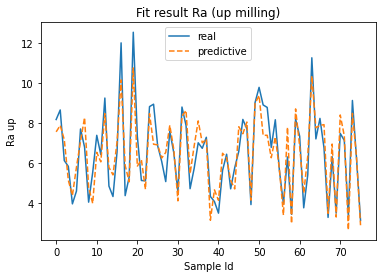

In [168]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

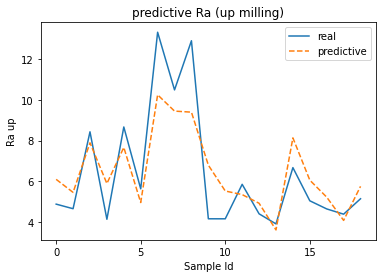

In [169]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [171]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [172]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.13
Coefficient of determination: 0.74
MAE:1.19
mean absolute percentage error:0.20


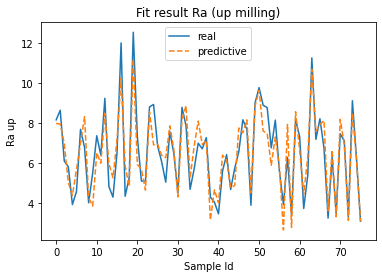

In [173]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

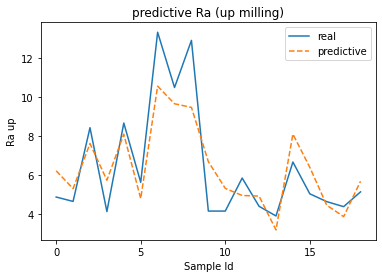

In [174]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [175]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [176]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.28
Coefficient of determination: 0.73
MAE:1.21
mean absolute percentage error:0.20


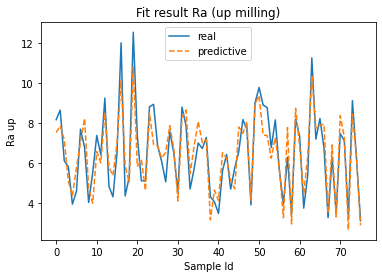

In [177]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

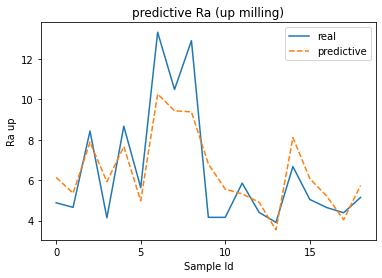

In [178]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

All models generate nearly the same result &#8594; nearly no overfitting occurs as the best regularization results are for the lowest alpha values

**Linear Regression only with vibrational Features**

In [179]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
#all_data = pd.read_csv('../data/train_{}.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
all_data

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.90500   800  26.229323    1295.769854   
1     2           8000  0.2  0.065   6.78175  1040  29.329545     994.685664   
2     3           8000  0.2  0.075   8.43450  1200  22.787313    1504.542610   
3     4           8000  0.2  0.100   6.77025  1600  28.397163    2118.802554   
4     5           8000  0.4  0.050  12.54250   800  43.666667     824.102151   
..  ...            ...  ...    ...       ...   ...        ...            ...   
95   96          16000  0.8  0.100   3.11025  3200  39.924444  160186.489802   
96   97          16000  1.0  0.050   5.85575  1600  25.689286   61144.222107   
97   98          16000  1.0  0.065   4.02725  2080   5.792453   95282.490852   
98   99          16000  1.0  0.075   3.47650  2400  14.818519  118458.498541   
99  100          16000  1.0  0.100   3.31500  3200   9.865741  173658.563286   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728   
1    43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421   
2    44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253   
3    54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027   
4    52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943   
..         ...       ...  ...       ...       ...       ...       ...   
95  401.333416     713.0  ...    1535.0     939.0  0.579099  3.145979   
96  248.164843     449.0  ...    1489.0     778.0  0.697902  3.294399   
97  308.150104     505.0  ...    1568.0     974.0  0.622258  3.585680   
98  343.859494     594.0  ...    1671.0    1069.0  1.037621  4.416112   
99  415.874887     710.0  ...    1795.0    1246.0  0.952835  4.112866   

    robot_t8  robot_t9    clamp_f1   clamp_f2   robot_f1   robot_f2  
0   1.223420  1.219488   17.582900  21.717172  51.978762   5.050505  
1   1.249903  1.244343   15.763967  21.717172  45.485476   4.545455  
2   1.249318  1.243240   20.080109  21.717172  63.985078   5.050505  
3   1.287632  1.278015   20.092329  21.717172  84.466924   5.050505  
4   1.141053  1.139565   13.043699   9.595960  32.618295   6.060606  
..       ...       ...         ...        ...        ...        ...  
95  1.561329  1.531499  298.469357  21.212121  80.588421   5.050505  
96  1.498190  1.479387  201.613311  21.212121  73.910743  40.909091  
97  1.583423  1.557819  233.721883  21.212121  85.220207   4.545455  
98  1.690326  1.655686  287.327157  21.212121  94.816151   4.545455  
99  1.767508  1.723052  278.428731  21.212121  84.996157  40.909091  

[95 rows x 28 columns]

In [180]:
used_feature = ['clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [181]:
X = all_data[used_feature] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, 
#X = all_data.drop(['Ra_{}'.format(up_or_down), 'Nr.'], axis=1)
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = all_data['Ra_{}'.format(up_or_down)]

**Linear Regression on selected Features - scaled**

In [182]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [183]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [184]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [185]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 4.72
Coefficient of determination: 0.43
MAE:1.59
mean absolute percentage error:0.24


**Lasso Regression on selected Features - scaled**

In [186]:
s = StandardScaler()

In [187]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [188]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.50
Coefficient of determination: 0.46
MAE:1.53
mean absolute percentage error:0.23


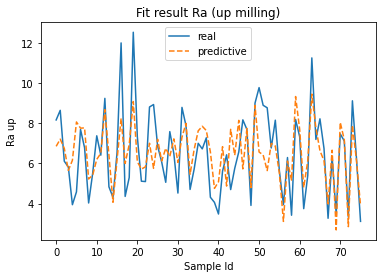

In [189]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

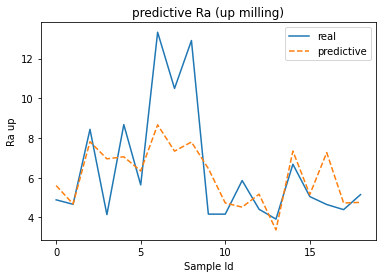

In [190]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [191]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [192]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 4.67
Coefficient of determination: 0.44
MAE:1.58
mean absolute percentage error:0.24


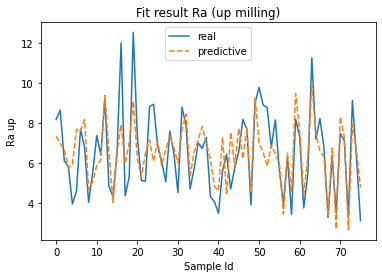

In [193]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

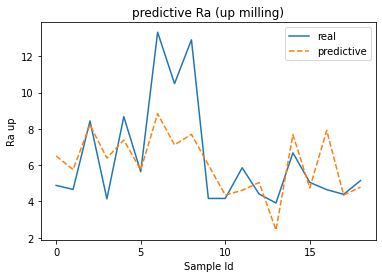

In [194]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [195]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [196]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 4.49
Coefficient of determination: 0.46
MAE:1.54
mean absolute percentage error:0.23


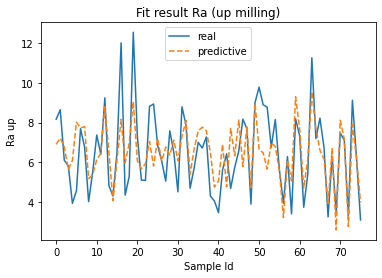

In [197]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Feature Set 2

In [42]:
train_data = pd.read_csv("../data/feature_set2/up_train_data.csv")
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = pd.read_csv("../data/feature_set2/up_test_data.csv")
test_data = test_data.drop(columns=["Unnamed: 0"])

In [43]:
x_train = train_data.drop(columns=["Ra_up"])
x_test = test_data.drop(columns=["Ra_up"])
y_train = train_data["Ra_up"].values
y_test = test_data["Ra_up"].values

In [44]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [45]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [46]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.70
Coefficient of determination: 0.68
MAE:1.33
mean absolute percentage error:0.22


**Lasso Regression on selected Features - scaled**

In [47]:
s = StandardScaler()

In [48]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [49]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 2.79
Coefficient of determination: 0.66
MAE:1.38
mean absolute percentage error:0.22


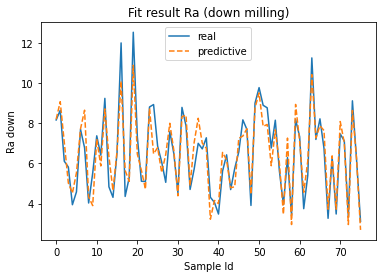

In [50]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

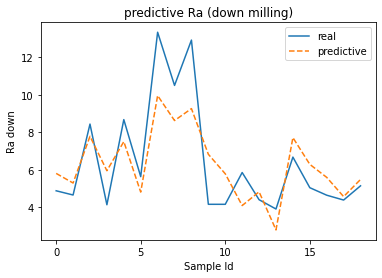

In [51]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [52]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [53]:
# The mean squared error
print(' Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

 Mean squared error: 2.70
Coefficient of determination: 0.68
MAE:1.34
mean absolute percentage error:0.22


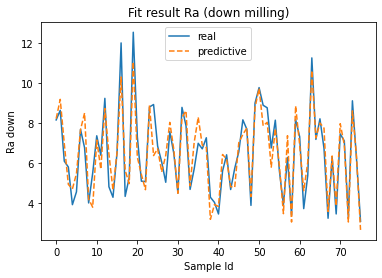

In [54]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

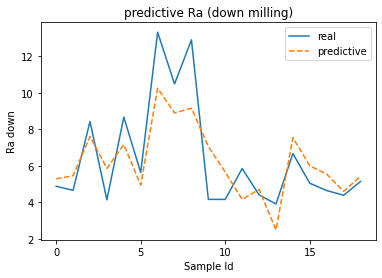

In [55]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [56]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [57]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.91
Coefficient of determination: 0.65
MAE:1.40
mean absolute percentage error:0.23


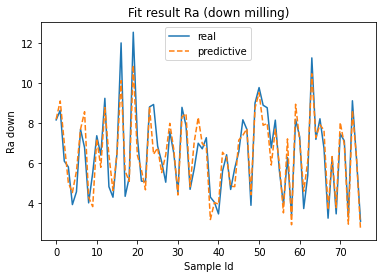

In [58]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

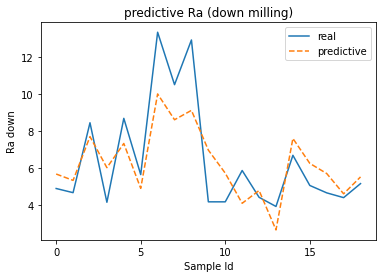

In [59]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Vibrational Data only**

In [60]:
x_train = train_data.drop(columns=["Ra_up", "vbs", "fz", "ap", "spindle_speed"])
x_test = test_data.drop(columns=["Ra_up", "vbs", "fz", "ap", "spindle_speed"])
y_train = train_data["Ra_up"].values
y_test = test_data["Ra_up"].values

In [61]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [62]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [63]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 8.26
Coefficient of determination: 0.01
MAE:2.35
mean absolute percentage error:0.37


**Lasso Regression on selected Features - scaled**

In [64]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [65]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 8.19
Coefficient of determination: 0.02
MAE:2.31
mean absolute percentage error:0.37


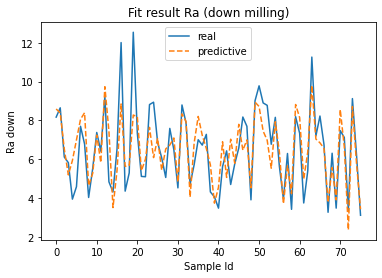

In [66]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

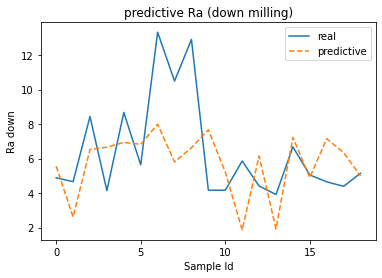

In [67]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [68]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [69]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 8.26
Coefficient of determination: 0.01
MAE:2.35
mean absolute percentage error:0.37


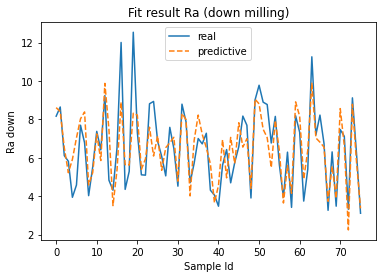

In [70]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

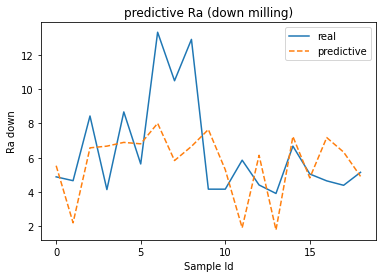

In [71]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [72]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [73]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 8.20
Coefficient of determination: 0.02
MAE:2.33
mean absolute percentage error:0.37


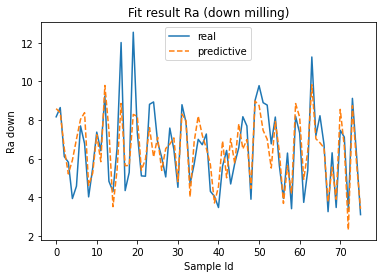

In [74]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

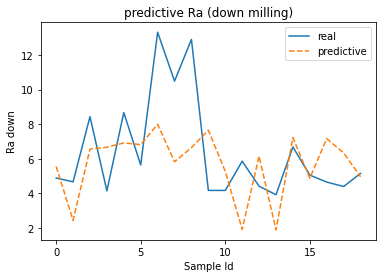

In [75]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Feature Set 3

In [44]:
train_data = pd.read_csv("../data/feature_set3/up_train_data.csv")
test_data = pd.read_csv("../data/feature_set3/up_test_data.csv")

##### Using all Features

In [46]:
x_train = train_data.drop(columns=["Unnamed: 0", "Ra_up"])
x_test = test_data.drop(columns=["Unnamed: 0", "Ra_up"])
y_train = train_data["Ra_up"]
y_test = test_data["Ra_up"]

In [47]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [48]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [49]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.51
Coefficient of determination: 0.70
MAE:1.30
mean absolute percentage error:0.22


**Lasso Regression on selected Features - scaled**

In [50]:
s = StandardScaler()

In [51]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [52]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 1.91
Coefficient of determination: 0.77
MAE:1.05
mean absolute percentage error:0.16


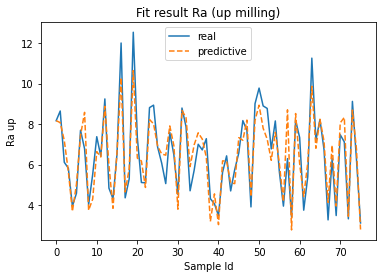

In [53]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

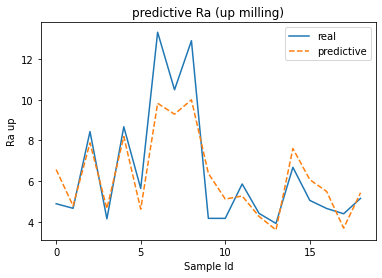

In [54]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [55]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 2.33
Coefficient of determination: 0.72
MAE:1.26
mean absolute percentage error:0.21


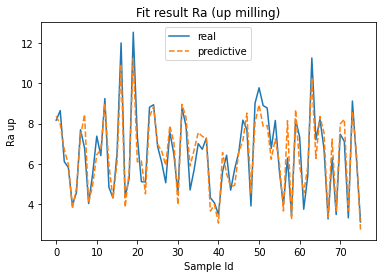

In [57]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

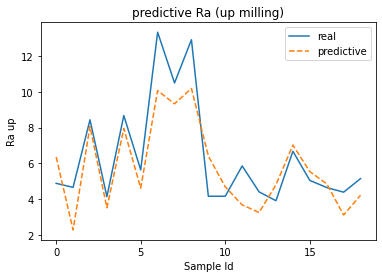

In [58]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [59]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [60]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 1.99
Coefficient of determination: 0.76
MAE:1.07
mean absolute percentage error:0.17


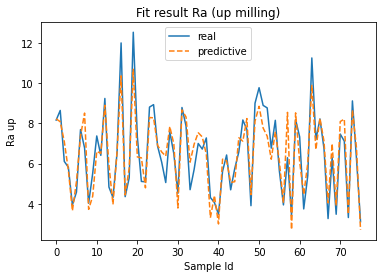

In [61]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

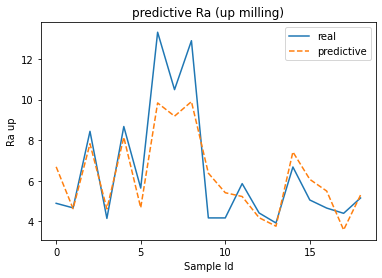

In [62]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Vibrational Data only**

In [63]:
x_train = train_data.drop(columns=["Unnamed: 0", "Ra_up", "spindle_speed", "vbs", "fz", "ap"])
x_test = test_data.drop(columns=["Unnamed: 0", "Ra_up", "spindle_speed", "vbs", "fz", "ap"])
y_train = train_data["Ra_up"]
y_test = test_data["Ra_up"]

In [64]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [65]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

In [66]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 7.78
Coefficient of determination: 0.07
MAE:2.00
mean absolute percentage error:0.29


**Lasso Regression on selected Features - scaled**

In [67]:
s = StandardScaler()

In [68]:
las = Lasso(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("lasso_regression", las)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [69]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.12
Coefficient of determination: 0.27
MAE:1.68
mean absolute percentage error:0.23


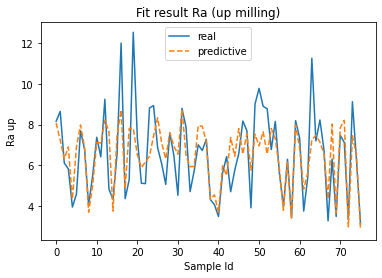

In [70]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

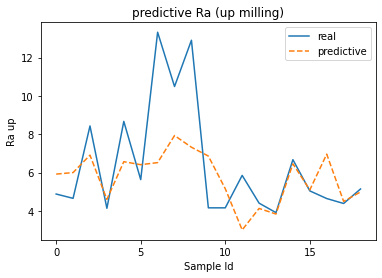

In [71]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Ridge Regression on selected Features - scaled**

In [72]:
rd = Ridge(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", rd)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [73]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 7.62
Coefficient of determination: 0.09
MAE:1.96
mean absolute percentage error:0.29


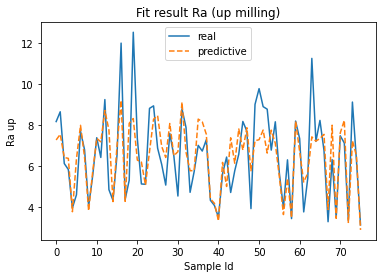

In [74]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

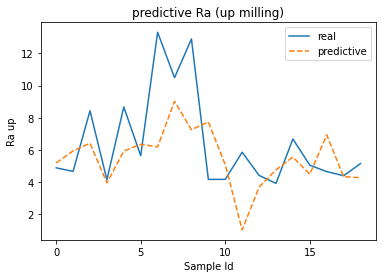

In [75]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**ElasticNet on selected Features - scaled**

In [76]:
en = ElasticNet(alpha=alpha, max_iter=100000)
    
estimator = Pipeline([
    ("scaler", s),
    ("ridge_regression", en)])

estimator.fit(x_train, y_train)
y_fit = estimator.predict(x_train)
y_pred = estimator.predict(x_test)

In [77]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test,y_pred))

Mean squared error: 6.23
Coefficient of determination: 0.25
MAE:1.71
mean absolute percentage error:0.24


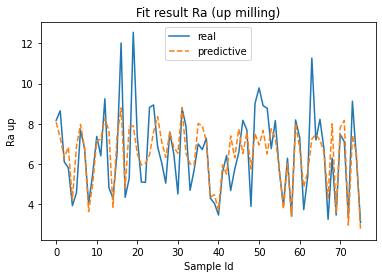

In [78]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit result Ra ({} milling)'.format(up_or_down))  # das ist ja der Fit auf dem Trainingsdatensatz, also nicht predictive
plt.legend() 
plt.show()

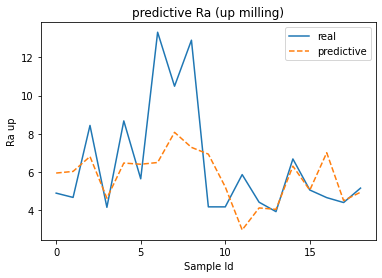

In [79]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**